In [1]:
import pandas as pd

In [2]:
data  = pd.read_csv("Bank_Loan_Data_Clean_VN.csv")

In [3]:
data.head()

,Trạng thái vay,Số tiền vay hiện tại,Kỳ hạn vay,Điểm tín dụng,Thu nhập năm,Số năm làm việc,Hình thức nhà ở,Mục đích vay,Nợ hàng tháng,Số năm lịch sử tín dụng,Số tài khoản đang hoạt động,Số vấn đề tín dụng,Số dư tín dụng hiện tại,Hạn mức tín dụng tối đa,Số lần phá sản,Số lần nợ thuế
0,Đã thanh toán,445412.0,Ngắn hạn,709.00,1.167493e+06,8,Thế chấp nhà,Sửa nhà,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Đã thanh toán,262328.0,Ngắn hạn,1076.46,1.378277e+06,10,Thế chấp nhà,Hợp nhất nợ,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Đã thanh toán,99999999.0,Ngắn hạn,741.00,2.231892e+06,8,Nhà riêng,Hợp nhất nợ,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Đã thanh toán,347666.0,Dài hạn,721.00,8.069490e+05,3,Nhà riêng,Hợp nhất nợ,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Đã thanh toán,176220.0,Ngắn hạn,1076.46,1.378277e+06,5,Thuê,Hợp nhất nợ,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
data.shape

(100000, 16)

In [5]:
missing_data = data.isnull().sum()
print(missing_data[missing_data>0])

Series([], dtype: int64)


In [6]:

pd.set_option('display.max_columns', None)  # Hiển thị tất cả cột
pd.set_option('display.width', 100000)  # Tăng chiều rộng để tránh xuống dòng
# Thiết lập tùy chọn để hiển thị tất cả các hàng
pd.set_option('display.max_rows', None)

# Thiết lập tùy chọn định dạng số để không sử dụng ký hiệu khoa học
pd.set_option('display.float_format', '{:.2f}'.format) # Hiển thị với 2 chữ số thập phân
# Hoặc
# pd.set_option('display.float_format', '{:.0f}'.format) # Hiển thị là số nguyên
# Hoặc
# pd.set_option('display.float_format', lambda x: '%.f' % x) # Một cách khác cho số nguyên
data.describe().round(1)

,Số tiền vay hiện tại,Điểm tín dụng,Thu nhập năm,Số năm làm việc,Nợ hàng tháng,Số năm lịch sử tín dụng,Số tài khoản đang hoạt động,Số vấn đề tín dụng,Số dư tín dụng hiện tại,Hạn mức tín dụng tối đa,Số lần phá sản,Số lần nợ thuế
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,11760447.40,1076.50,1378276.60,6.10,18472.40,18.20,11.10,0.20,294637.40,760798.40,0.10,0.00
std,31783942.50,1326.60,972297.40,3.60,12175.00,7.00,5.00,0.50,376170.90,8384419.60,0.40,0.30
min,10802.00,585.00,76627.00,0.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,711.00,931180.50,3.00,10214.20,13.50,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,733.00,1369919.00,6.00,16220.30,16.90,10.00,0.00,209817.00,467885.00,0.00,0.00
75%,524942.00,750.00,1512704.00,10.00,24012.10,21.70,14.00,0.00,367958.80,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,10.00,435843.30,70.50,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


# Thuật Toán Phân Lớp 1 Cây Quyết Định 

In [7]:
# Mục Tiêu: 
#Bài toán phân lớp: Dự đoán "Trạng thái vay" (Ví dụ: "Đã thanh toán" hoặc "Chưa thanh toán") 
# dựa trên các đặc trưng khác như số tiền vay, điểm tín dụng, thu nhập, số năm làm việc,
#  mục đích vay, nợ hàng tháng, số vấn đề tín dụng, v.v.
#Mục tiêu: Dự đoán liệu khách hàng có thể thanh toán khoản vay hay không,
#  dựa trên các yếu tố tài chính và lịch sử tín dụng.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [9]:

# Mã hóa dữ liệu phân loại
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

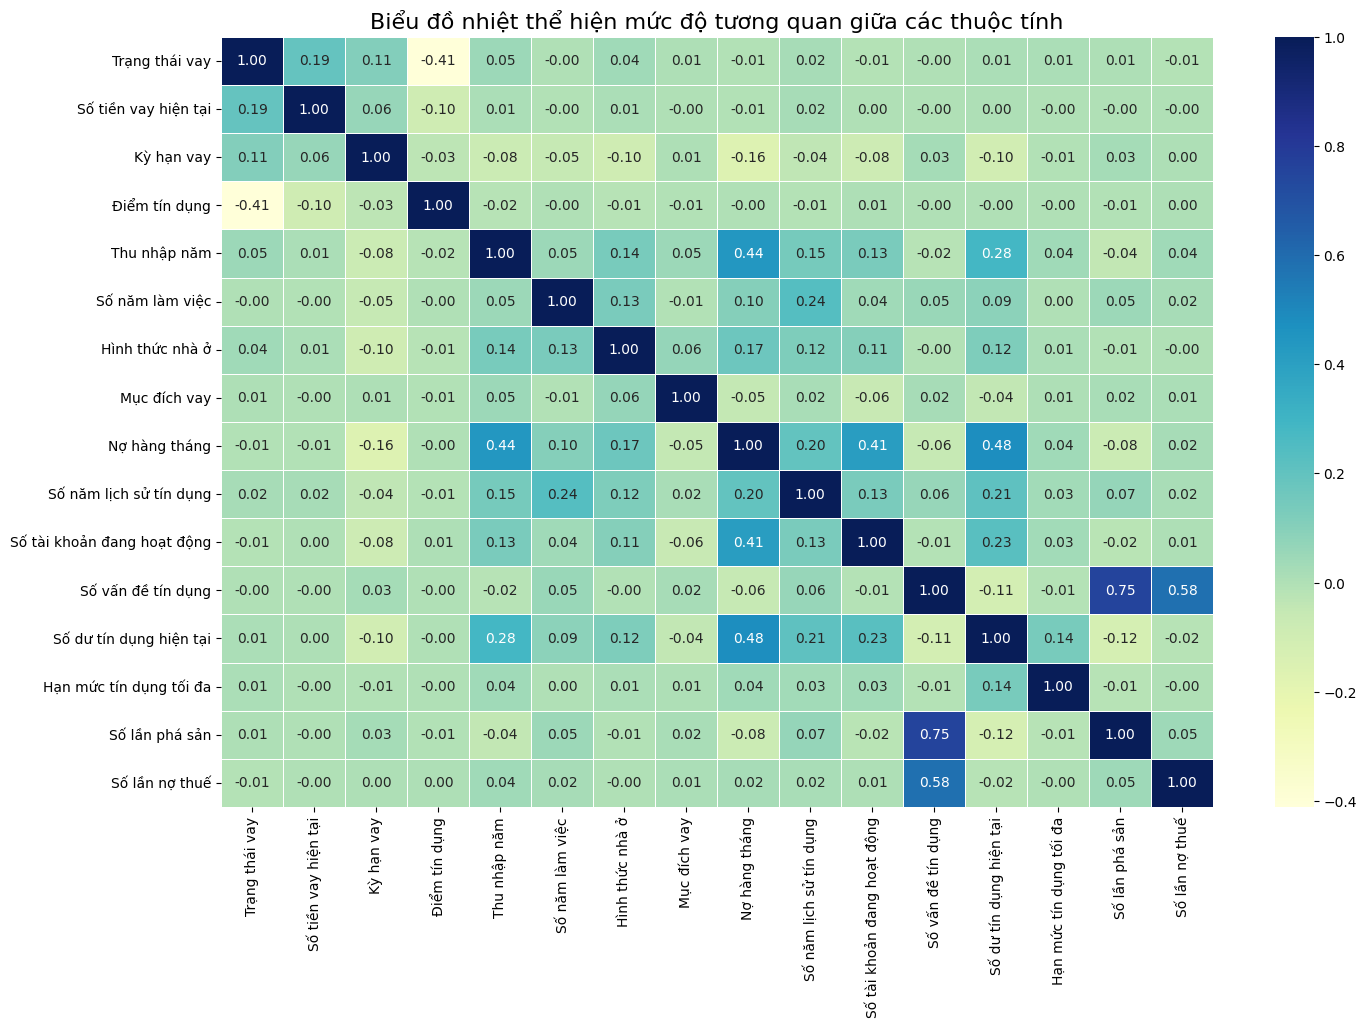

In [10]:
# Vẽ biểu đồ nhiệt để rút trích thuộc tính
plt.figure(figsize=(16, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Biểu đồ nhiệt thể hiện mức độ tương quan giữa các thuộc tính', fontsize=16)
plt.show()

In [11]:
# Split data
X = data.drop('Trạng thái vay', axis=1)
y = data['Trạng thái vay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Thuộc tính quan trọng nhất:\n")
print(feature_importance)

Accuracy: 0.8201
Thuộc tính quan trọng nhất:

Điểm tín dụng                 0.69
Số tiền vay hiện tại          0.24
Kỳ hạn vay                    0.04
Thu nhập năm                  0.03
Hình thức nhà ở               0.00
Số năm làm việc               0.00
Mục đích vay                  0.00
Nợ hàng tháng                 0.00
Số năm lịch sử tín dụng       0.00
Số tài khoản đang hoạt động   0.00
Số vấn đề tín dụng            0.00
Số dư tín dụng hiện tại       0.00
Hạn mức tín dụng tối đa       0.00
Số lần phá sản                0.00
Số lần nợ thuế                0.00
dtype: float64


C:\Users\Vi Tính Xuân Lộc\AppData\Local\Temp\ipykernel_10664\104167244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='coolwarm')


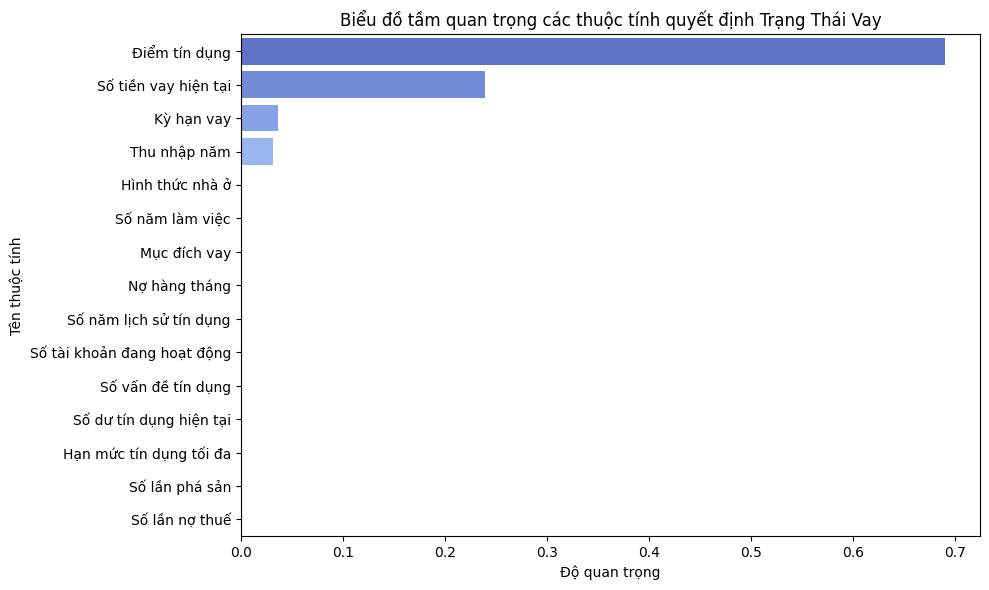

In [12]:
# Vẽ biểu đồ tầm quan trọng thuộc tính
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='coolwarm')
plt.title('Biểu đồ tầm quan trọng các thuộc tính quyết định Trạng Thái Vay')
plt.xlabel('Độ quan trọng')
plt.ylabel('Tên thuộc tính')
plt.tight_layout()
plt.show()

In [13]:
# Lấy thuộc tính quan trọng
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
important_features = feature_importance[feature_importance > 0].index.tolist()
# Tạo dữ liệu mới chỉ có thuộc tính quan trọng
X_new = X[important_features]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train lại model với dữ liệu đã rút trích
model_new = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
start = time.time()
model_new.fit(X_train_new, y_train_new)
end = time.time()

# Dự đoán
y_pred_new = model_new.predict(X_test_new)

# In kết quả
print("Độ chính xác:", accuracy_score(y_test_new, y_pred_new))
print("Thời gian chạy:", end - start, "giây")
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test_new, y_pred_new))
print("Báo cáo phân loại:\n", classification_report(y_test_new, y_pred_new))


Độ chính xác: 0.8201
Thời gian chạy: 0.11816859245300293 giây
Ma trận nhầm lẫn:
 [[  933  3598]
 [    0 15469]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      0.21      0.34      4531
           1       0.81      1.00      0.90     15469

    accuracy                           0.82     20000
   macro avg       0.91      0.60      0.62     20000
weighted avg       0.85      0.82      0.77     20000



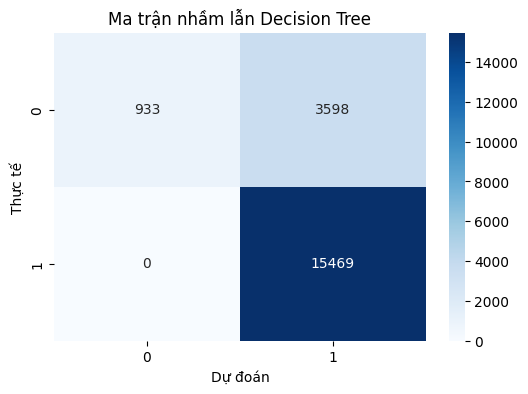

In [14]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_new, y_pred_new), annot=True, fmt="d", cmap="Blues")
plt.title("Ma trận nhầm lẫn Decision Tree")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

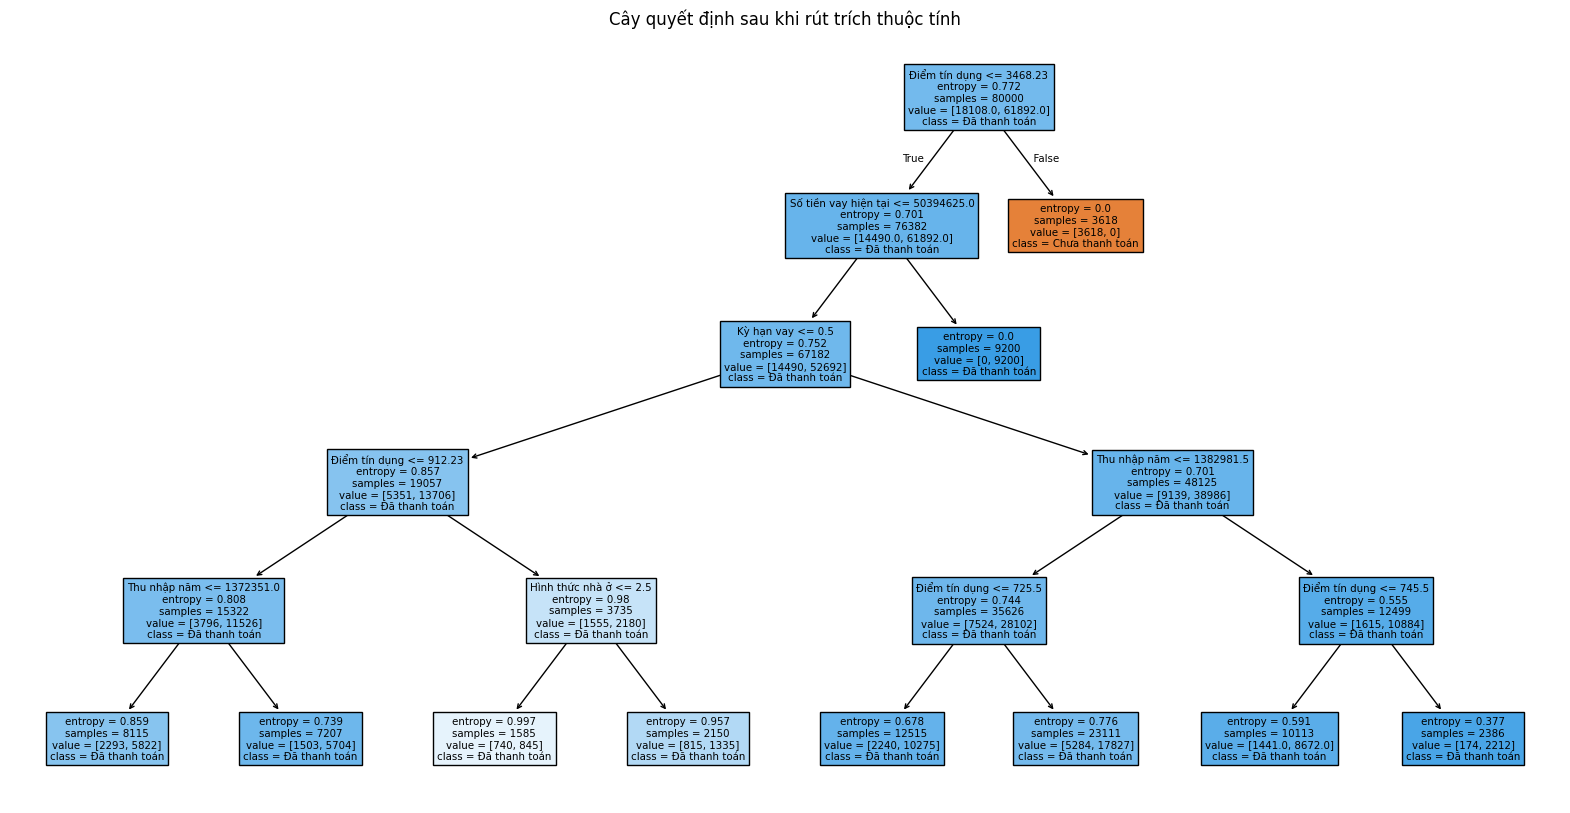

In [15]:
# Vẽ cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(model_new, feature_names=X_new.columns, class_names=['Chưa thanh toán', 'Đã thanh toán'], filled=True)
plt.title("Cây quyết định sau khi rút trích thuộc tính")
plt.show()

# Thuật Toán Phân Lớp 2 Naive Bayes

In [16]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [18]:
# Split data
X = data.drop('Trạng thái vay', axis=1)
y = data['Trạng thái vay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [20]:
# Predict
y_pred = model.predict(X_test)


Accuracy: 0.3469
Giá trị trung bình thuộc tính theo nhóm trạng thái vay:

Trạng thái vay                       0           1
Số tiền vay hiện tại         325065.13 15127708.35
Kỳ hạn vay                        0.63        0.75
Điểm tín dụng                  2077.12      781.25
Thu nhập năm                1294048.04  1403284.46
Số năm làm việc                   6.07        6.07
Hình thức nhà ở                   2.35        2.40
Mục đích vay                      4.79        4.83
Nợ hàng tháng                 18602.03    18445.27
Số năm lịch sử tín dụng          17.87       18.31
Số tài khoản đang hoạt động      11.24       11.11
Số vấn đề tín dụng                0.17        0.17
Số dư tín dụng hiện tại      285524.54   296950.51
Hạn mức tín dụng tối đa      626455.13   821610.97
Số lần phá sản                    0.11        0.12
Số lần nợ thuế                    0.03        0.03


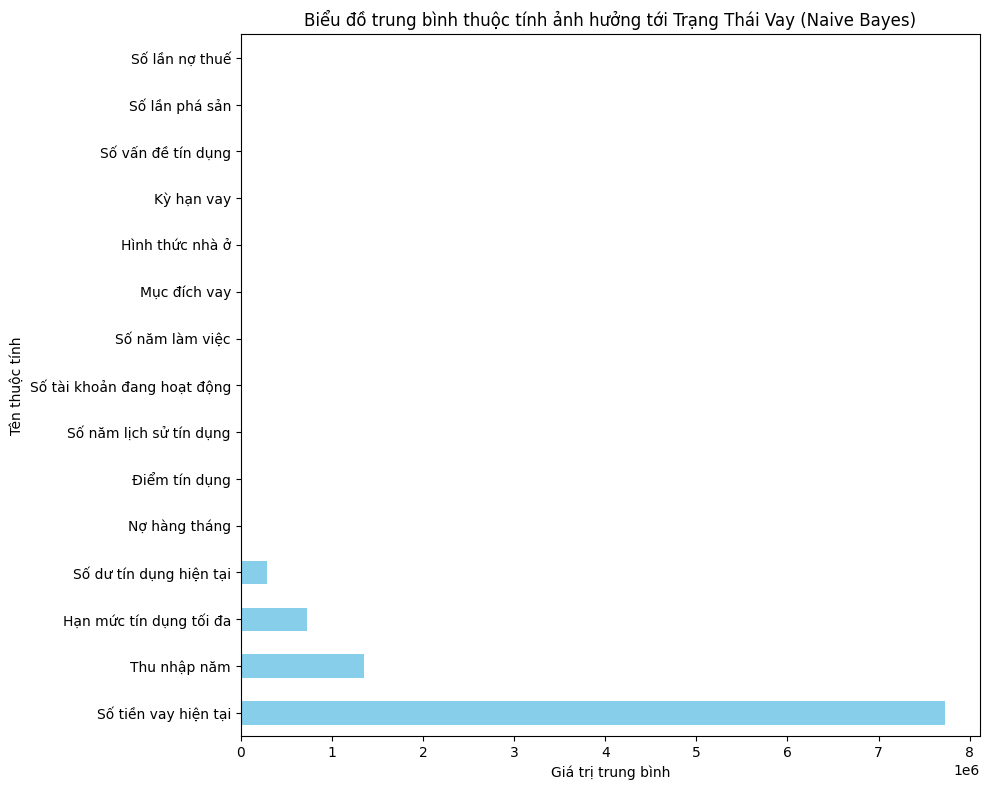

In [21]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Tính giá trị trung bình của các thuộc tính theo nhóm Trạng thái vay
feature_importance = X_train.groupby(y_train).mean().T

print("Giá trị trung bình thuộc tính theo nhóm trạng thái vay:\n")
print(feature_importance)

# Vẽ biểu đồ tầm quan trọng thuộc tính (trung bình cao là ảnh hưởng nhiều)
plt.figure(figsize=(10, 8))
feature_importance.mean(axis=1).sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Biểu đồ trung bình thuộc tính ảnh hưởng tới Trạng Thái Vay (Naive Bayes)')
plt.xlabel('Giá trị trung bình')
plt.ylabel('Tên thuộc tính')
plt.tight_layout()
plt.show()

In [22]:
# Huấn luyện Naive Bayes gốc
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [23]:
# Tính giá trị trung bình các thuộc tính theo nhóm
feature_importance = X_train.groupby(y_train).mean().T

In [24]:
# Lấy 4 thuộc tính có độ chênh lớn nhất giữa 2 nhóm
feature_diff = (feature_importance[0] - feature_importance[1]).abs()
important_features = feature_diff.sort_values(ascending=False).head(4).index.tolist()

print("Top 4 thuộc tính quan trọng nhất:\n")
print(important_features)

Top 4 thuộc tính quan trọng nhất:

['Số tiền vay hiện tại', 'Hạn mức tín dụng tối đa', 'Thu nhập năm', 'Số dư tín dụng hiện tại']


In [25]:
# Tạo dữ liệu mới với 4 thuộc tính quan trọng
X_new = X[important_features]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [26]:
# Train lại Naive Bayes với dữ liệu mới
model_new = GaussianNB()
start = time.time()
model_new.fit(X_train_new, y_train_new)
end = time.time()

In [27]:
# Dự đoán
y_pred_new = model_new.predict(X_test_new)

# In kết quả
print("\nĐộ chính xác:", accuracy_score(y_test_new, y_pred_new))
print("Thời gian chạy:", round(end - start, 4), "giây")
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test_new, y_pred_new))
print("Báo cáo phân loại:\n", classification_report(y_test_new, y_pred_new))


Độ chính xác: 0.34565
Thời gian chạy: 0.0157 giây
Ma trận nhầm lẫn:
 [[ 4496    35]
 [13052  2417]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.26      0.99      0.41      4531
           1       0.99      0.16      0.27     15469

    accuracy                           0.35     20000
   macro avg       0.62      0.57      0.34     20000
weighted avg       0.82      0.35      0.30     20000



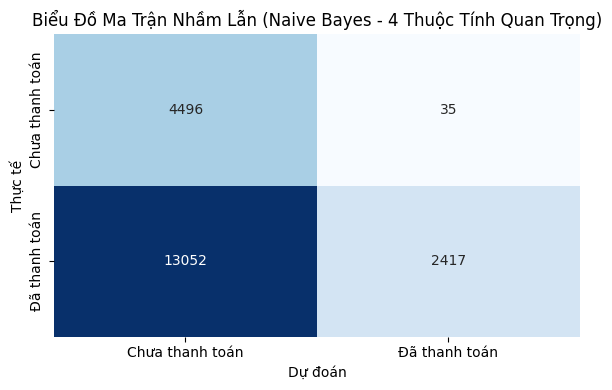

In [28]:
# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_new, y_pred_new), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Biểu Đồ Ma Trận Nhầm Lẫn (Naive Bayes - 4 Thuộc Tính Quan Trọng)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.xticks([0.5, 1.5], ['Chưa thanh toán', 'Đã thanh toán'])
plt.yticks([0.5, 1.5], ['Chưa thanh toán', 'Đã thanh toán'])
plt.tight_layout()
plt.show()

# Thuật Toán Phân Lớp 3 Support Vector Machine 

In [29]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC

In [30]:
# Encode dữ liệu phân loại
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [31]:
# Tách X và y
X = data.drop('Trạng thái vay', axis=1)
y = data['Trạng thái vay']

In [32]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rút trích 4 thuộc tính quan trọng nhất
feature_importance = X_train.groupby(y_train).mean().T
feature_diff = (feature_importance[0] - feature_importance[1]).abs()
important_features = feature_diff.sort_values(ascending=False).head(4).index.tolist()

print("Top 4 thuộc tính quan trọng nhất:", important_features)

Top 4 thuộc tính quan trọng nhất: ['Số tiền vay hiện tại', 'Hạn mức tín dụng tối đa', 'Thu nhập năm', 'Số dư tín dụng hiện tại']


In [33]:
# Dữ liệu mới chỉ chứa 4 thuộc tính quan trọng
X_new = X[important_features]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [34]:

# Huấn luyện SVM
model_svm = LinearSVC(max_iter=10000)  # Cho lặp nhiều lần để hội tụ
start = time.time()
model_svm.fit(X_train_new, y_train_new)
end = time.time()

In [35]:
# Dự đoán
y_pred_svm = model_svm.predict(X_test_new)

In [36]:
# Đánh giá
print("Độ chính xác:", accuracy_score(y_test_new, y_pred_svm))
print("Thời gian chạy:", end - start, "giây")
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test_new, y_pred_svm))
print("Báo cáo phân loại:\n", classification_report(y_test_new, y_pred_svm))

Độ chính xác: 0.77345
Thời gian chạy: 0.10738158226013184 giây
Ma trận nhầm lẫn:
 [[    0  4531]
 [    0 15469]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4531
           1       0.77      1.00      0.87     15469

    accuracy                           0.77     20000
   macro avg       0.39      0.50      0.44     20000
weighted avg       0.60      0.77      0.67     20000



c:\FilePM\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\FilePM\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\FilePM\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


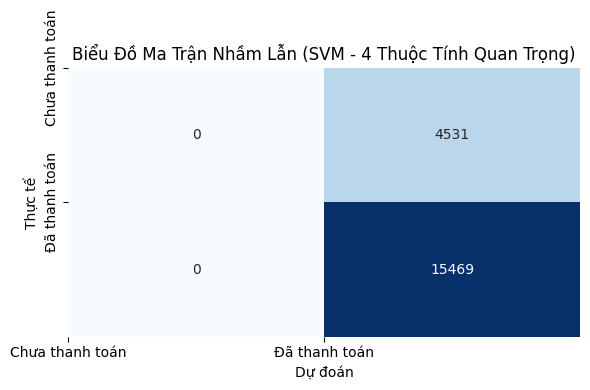

In [37]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_new, y_pred_svm), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Biểu Đồ Ma Trận Nhầm Lẫn (SVM - 4 Thuộc Tính Quan Trọng)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.xticks([0, 1], ['Chưa thanh toán', 'Đã thanh toán'])
plt.yticks([0, 1], ['Chưa thanh toán', 'Đã thanh toán'])
plt.tight_layout()
plt.show()

In [38]:
feature_importance = X_train.groupby(y_train).mean().T
feature_diff = (feature_importance[0] - feature_importance[1]).abs()
important_features = feature_diff.sort_values(ascending=False).head(4).index.tolist()

X_new = X[important_features]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42),
    'SVM': LinearSVC(max_iter=10000)
}

acc_list = []
time_list = []
model_list = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train_new, y_train_new)
    end = time.time()
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test_new, y_pred)
    cm = confusion_matrix(y_test_new, y_pred)
    print(name)
    print("Accuracy:", acc)
    print("Time:", end - start)
    print("Confusion Matrix:\n", cm)
    print("-" * 80)
    acc_list.append(acc)
    time_list.append(end - start)
    model_list.append(name)

Naive Bayes
Accuracy: 0.34565
Time: 0.016491174697875977
Confusion Matrix:
 [[ 4496    35]
 [13052  2417]]
--------------------------------------------------------------------------------
Decision Tree
Accuracy: 0.77345
Time: 0.22588348388671875
Confusion Matrix:
 [[    0  4531]
 [    0 15469]]
--------------------------------------------------------------------------------
SVM
Accuracy: 0.77345
Time: 0.0724647045135498
Confusion Matrix:
 [[    0  4531]
 [    0 15469]]
--------------------------------------------------------------------------------


C:\Users\Vi Tính Xuân Lộc\AppData\Local\Temp\ipykernel_10664\3205691525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_list, y=model_list, palette='Blues_d')


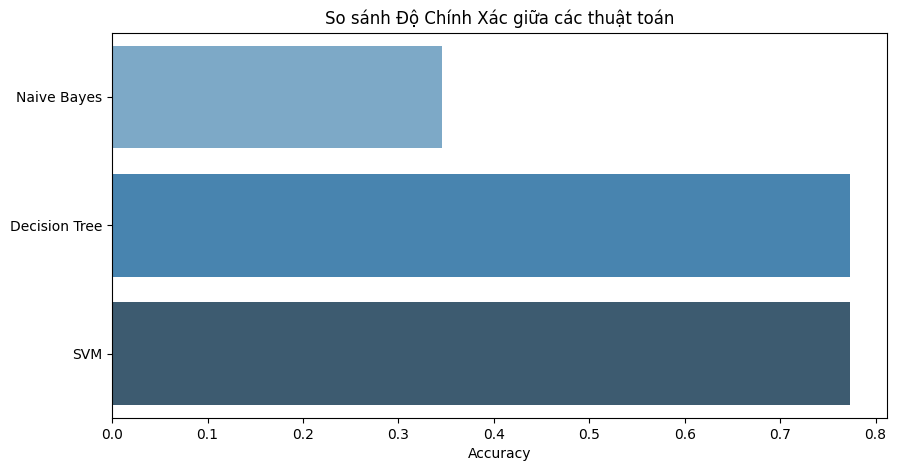

C:\Users\Vi Tính Xuân Lộc\AppData\Local\Temp\ipykernel_10664\3205691525.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_list, y=model_list, palette='Reds')


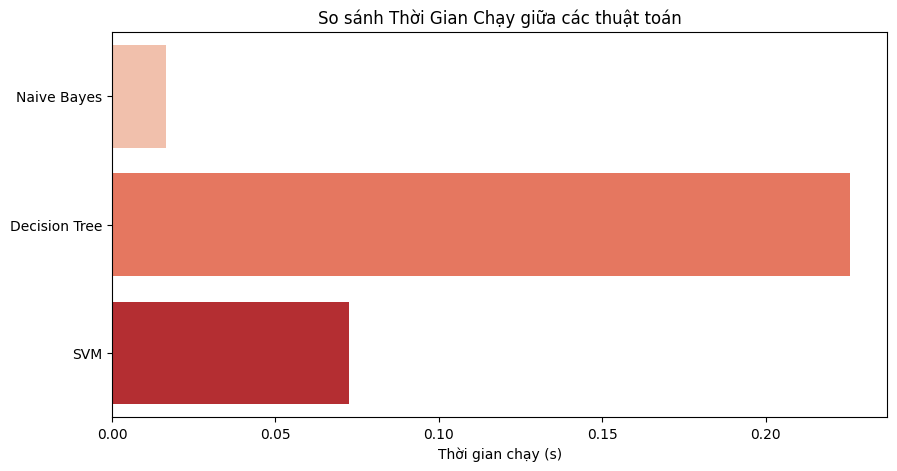

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x=acc_list, y=model_list, palette='Blues_d')
plt.xlabel('Accuracy')
plt.title('So sánh Độ Chính Xác giữa các thuật toán')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=time_list, y=model_list, palette='Reds')
plt.xlabel('Thời gian chạy (s)')
plt.title('So sánh Thời Gian Chạy giữa các thuật toán')
plt.show()
